In [1]:
import matplotlib.pyplot as plt
import numpy as np
import magpylib as magpy
import random
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [2]:
number_causal_genes = 5
number_total_genes = 20000

In [3]:
# Choose positions of causal genes
# [179, 198, 12, 18, 144]
magnet_positions =  [random.randint(0, number_total_genes) for _ in range(number_causal_genes)]
print("List of positions:", magnet_positions)

List of positions: [9539, 16380, 15896, 919, 3348]


In [4]:
# Initialise magnets
pol = 2
size = 1
cube1 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube2 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube3 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube4 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
cube5 = magpy.magnet.Cuboid(polarization=(pol, 0, 0), dimension=(size, size, 1))
magnets_list = [cube1, cube2, cube3, cube4, cube5]

In [5]:
random.randint(-40, 0)

-12

In [6]:
magnets_used = 0
duds_list = []
for i in range(number_total_genes):
    y_pos = i
    # Choose a strength (nearness to dashed line)
    x_pos = random.randint(-40, 0)
    if i in magnet_positions:
        # Update position of magnet
        magnets_list[magnets_used].position = (x_pos,y_pos,0)
        magnets_used += 1
    else:
        # Make a dud
        duds_list.append([x_pos,y_pos])
    

In [7]:
# Make collection of the magnets
# coll = magpy.Collection(cube1, cube2, cube3, cube4, cube5)

In [8]:
zero_threshold = 0.0001

In [9]:
col_titles = ["Feature_" + str(i) for i in range(number_total_genes)]
col_titles.append("phenotype")

In [10]:
coll_exp = magpy.Collection(magnets_list, override_parent=True)

In [11]:
polarisation_levels = [0,1,2]
polarisation_probabilities = [0.6, 0.3, 0.1]

In [12]:
NUM_SAMPLES = 1000
data_df = pd.DataFrame()
polarisation_df = pd.DataFrame()

for j in range(NUM_SAMPLES):

    magnets_used = 0
    duds_list = []
    overall_list = [] # List does not discriminate between magnet and dud
    polarisation_list = []
    for i in range(number_total_genes):
        y_pos = i
        # Choose a strength (nearness to dashed line)
        x_pos = np.random.uniform(-40,5)
        pol =  random.choices(polarisation_levels, weights=polarisation_probabilities, k=1)[0],0,0 #(random.randint(0,2),0,0)
        if i in magnet_positions:
            # Update position of magnet
            magnets_list[magnets_used].position = (x_pos,y_pos,0)
            magnets_list[magnets_used].polarization = pol
            magnets_used += 1
        else:
            # Make a dud
            duds_list.append([x_pos,y_pos])
        overall_list.append(x_pos)
        polarisation_list.append(pol[0])
    
    # Create an observer grid in the xz-symmetry plane
    X, Y = np.mgrid[-50:50:1000j, 0:number_total_genes:1000j].transpose((0, 2, 1))
    grid = np.stack([X, Y, np.zeros((1000, 1000))], axis=2)

    H = coll_exp.getH(grid)

    phenotype = np.mean(H[:,700,0])
    overall_list.append(phenotype)
    polarisation_list.append(phenotype)

    data_df = pd.concat([data_df, pd.DataFrame(overall_list).T])
    polarisation_df = pd.concat([polarisation_df, pd.DataFrame(polarisation_list).T])
    print(phenotype)

0.022267487901428587
0.03916014428439166
0.003405829481963581
0.0
0.0048788999621357755
0.0024302371654068224
0.02511313952209339
0.04570797920778557
0.018411637935444935
0.04205173675901596
0.009617039179722224
0.006298546803837245
0.012127199465284007
0.04099670394981525
0.023663672872759015
0.026304782306751085
0.03266651599841383
0.029857936211820986
0.006326263231490123
0.0108698988130851
0.01105367800679877
0.007192485602976122
0.026836657573640274
0.004645722938907428
0.0057916951087238515
0.005551813778239773
0.018380948748566616
0.044113300200688634
0.020279520337957557
0.01596558769145769
0.04043509068670314
0.0
0.0
0.048683436162418534
0.0024071259990318798
0.008937733803449782
0.08946681091660398
0.06237297741088834
0.017504732141980443
0.021916399840745022
0.03401820781895092
0.0020622573436162553
0.004476721808914366
0.019978790334753933
0.024935867324363842
0.024732352125272777
0.04690279950486487
0.04052821102685672
0.010593783597460748
0.010952587540734063
0.0181994293

In [13]:
polarisation_df

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.022267
0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.039160
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.003406
0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.015942
0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.026447
0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.014401
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.023628


In [14]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
0,-9.831577,-20.794369,-20.440206,4.507898,-20.087599,-36.527968,-13.886154,-37.275669,-13.710529,-4.065796,...,-25.336375,-11.941079,3.799876,-2.360154,3.202726,2.657254,-15.107364,-31.673034,-37.945531,0.022267
0,-32.871554,-9.869246,-16.620633,-0.256644,-8.376927,-19.007687,-8.902283,-27.220169,-16.376927,0.308327,...,-37.874708,-29.802046,-7.635504,-13.438063,-18.649261,-12.932401,-8.803225,-10.544509,-38.067979,0.039160
0,-1.321048,-37.027574,-11.249493,0.505874,1.402661,-16.639821,-9.752020,-36.842611,-33.147690,-20.979542,...,1.153020,-8.262404,-28.974697,-4.951886,-32.310652,-21.305072,0.825154,-25.259396,-37.327744,0.003406
0,-25.202429,-13.798160,-30.371571,-36.239307,-32.272815,3.992365,-5.684323,-27.940106,-25.722484,-1.521116,...,0.619340,-20.814468,-19.056775,-7.931299,-6.949247,-25.755095,-23.492105,3.075074,-34.200237,0.000000
0,-9.644716,-28.603432,-8.708208,-31.931663,-2.435151,-21.317305,-35.555662,3.913905,-2.850180,2.848396,...,-18.173027,-24.464497,-7.520916,-37.307586,-20.369433,-14.119145,-25.220672,-4.983358,-15.413435,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-15.903657,-2.021054,-2.769084,-33.561994,-35.825274,-11.028466,-15.425968,-24.251062,-6.354522,-4.808281,...,-6.996850,-12.391137,1.823316,1.919978,-37.137566,-33.367268,-19.599468,-22.920171,-32.958192,0.015942
0,-5.377667,-17.630706,-0.490945,-7.182229,-34.536137,-14.645008,-1.803130,-36.279216,4.693293,-25.671425,...,-20.672593,-34.841508,-28.407316,-4.208357,-14.338628,-23.928923,-7.622705,-14.012542,-25.028756,0.026447
0,-17.718700,-37.535338,-27.494259,-1.474253,-37.811134,-34.211035,-16.800595,1.935874,0.048402,-11.132674,...,-18.612905,-14.621961,-28.823328,-1.220556,-11.225540,-3.506099,-19.090410,-12.784592,3.195032,0.014401
0,-24.273380,-27.870955,-7.739709,-4.364545,-31.388207,-12.470349,-39.476193,-29.976027,-18.589443,-10.751223,...,-17.286933,-29.192464,-26.437895,-4.110111,-28.273683,-16.017269,-11.769927,-21.958178,-27.096470,0.023628


In [15]:
data_df_renames = data_df.rename(columns=dict(zip(data_df.columns, col_titles)))
data_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_19991,Feature_19992,Feature_19993,Feature_19994,Feature_19995,Feature_19996,Feature_19997,Feature_19998,Feature_19999,phenotype
0,-9.831577,-20.794369,-20.440206,4.507898,-20.087599,-36.527968,-13.886154,-37.275669,-13.710529,-4.065796,...,-25.336375,-11.941079,3.799876,-2.360154,3.202726,2.657254,-15.107364,-31.673034,-37.945531,0.022267
0,-32.871554,-9.869246,-16.620633,-0.256644,-8.376927,-19.007687,-8.902283,-27.220169,-16.376927,0.308327,...,-37.874708,-29.802046,-7.635504,-13.438063,-18.649261,-12.932401,-8.803225,-10.544509,-38.067979,0.039160
0,-1.321048,-37.027574,-11.249493,0.505874,1.402661,-16.639821,-9.752020,-36.842611,-33.147690,-20.979542,...,1.153020,-8.262404,-28.974697,-4.951886,-32.310652,-21.305072,0.825154,-25.259396,-37.327744,0.003406
0,-25.202429,-13.798160,-30.371571,-36.239307,-32.272815,3.992365,-5.684323,-27.940106,-25.722484,-1.521116,...,0.619340,-20.814468,-19.056775,-7.931299,-6.949247,-25.755095,-23.492105,3.075074,-34.200237,0.000000
0,-9.644716,-28.603432,-8.708208,-31.931663,-2.435151,-21.317305,-35.555662,3.913905,-2.850180,2.848396,...,-18.173027,-24.464497,-7.520916,-37.307586,-20.369433,-14.119145,-25.220672,-4.983358,-15.413435,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-15.903657,-2.021054,-2.769084,-33.561994,-35.825274,-11.028466,-15.425968,-24.251062,-6.354522,-4.808281,...,-6.996850,-12.391137,1.823316,1.919978,-37.137566,-33.367268,-19.599468,-22.920171,-32.958192,0.015942
0,-5.377667,-17.630706,-0.490945,-7.182229,-34.536137,-14.645008,-1.803130,-36.279216,4.693293,-25.671425,...,-20.672593,-34.841508,-28.407316,-4.208357,-14.338628,-23.928923,-7.622705,-14.012542,-25.028756,0.026447
0,-17.718700,-37.535338,-27.494259,-1.474253,-37.811134,-34.211035,-16.800595,1.935874,0.048402,-11.132674,...,-18.612905,-14.621961,-28.823328,-1.220556,-11.225540,-3.506099,-19.090410,-12.784592,3.195032,0.014401
0,-24.273380,-27.870955,-7.739709,-4.364545,-31.388207,-12.470349,-39.476193,-29.976027,-18.589443,-10.751223,...,-17.286933,-29.192464,-26.437895,-4.110111,-28.273683,-16.017269,-11.769927,-21.958178,-27.096470,0.023628


In [16]:
data_df_renames = data_df_renames.reset_index(drop=True)
data_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_19991,Feature_19992,Feature_19993,Feature_19994,Feature_19995,Feature_19996,Feature_19997,Feature_19998,Feature_19999,phenotype
0,-9.831577,-20.794369,-20.440206,4.507898,-20.087599,-36.527968,-13.886154,-37.275669,-13.710529,-4.065796,...,-25.336375,-11.941079,3.799876,-2.360154,3.202726,2.657254,-15.107364,-31.673034,-37.945531,0.022267
1,-32.871554,-9.869246,-16.620633,-0.256644,-8.376927,-19.007687,-8.902283,-27.220169,-16.376927,0.308327,...,-37.874708,-29.802046,-7.635504,-13.438063,-18.649261,-12.932401,-8.803225,-10.544509,-38.067979,0.039160
2,-1.321048,-37.027574,-11.249493,0.505874,1.402661,-16.639821,-9.752020,-36.842611,-33.147690,-20.979542,...,1.153020,-8.262404,-28.974697,-4.951886,-32.310652,-21.305072,0.825154,-25.259396,-37.327744,0.003406
3,-25.202429,-13.798160,-30.371571,-36.239307,-32.272815,3.992365,-5.684323,-27.940106,-25.722484,-1.521116,...,0.619340,-20.814468,-19.056775,-7.931299,-6.949247,-25.755095,-23.492105,3.075074,-34.200237,0.000000
4,-9.644716,-28.603432,-8.708208,-31.931663,-2.435151,-21.317305,-35.555662,3.913905,-2.850180,2.848396,...,-18.173027,-24.464497,-7.520916,-37.307586,-20.369433,-14.119145,-25.220672,-4.983358,-15.413435,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-15.903657,-2.021054,-2.769084,-33.561994,-35.825274,-11.028466,-15.425968,-24.251062,-6.354522,-4.808281,...,-6.996850,-12.391137,1.823316,1.919978,-37.137566,-33.367268,-19.599468,-22.920171,-32.958192,0.015942
996,-5.377667,-17.630706,-0.490945,-7.182229,-34.536137,-14.645008,-1.803130,-36.279216,4.693293,-25.671425,...,-20.672593,-34.841508,-28.407316,-4.208357,-14.338628,-23.928923,-7.622705,-14.012542,-25.028756,0.026447
997,-17.718700,-37.535338,-27.494259,-1.474253,-37.811134,-34.211035,-16.800595,1.935874,0.048402,-11.132674,...,-18.612905,-14.621961,-28.823328,-1.220556,-11.225540,-3.506099,-19.090410,-12.784592,3.195032,0.014401
998,-24.273380,-27.870955,-7.739709,-4.364545,-31.388207,-12.470349,-39.476193,-29.976027,-18.589443,-10.751223,...,-17.286933,-29.192464,-26.437895,-4.110111,-28.273683,-16.017269,-11.769927,-21.958178,-27.096470,0.023628


In [17]:
data_df_renames.to_csv("../../data/magnet_dataset_x_positions.csv")

Text(0.5, 0, 'Phenotype')

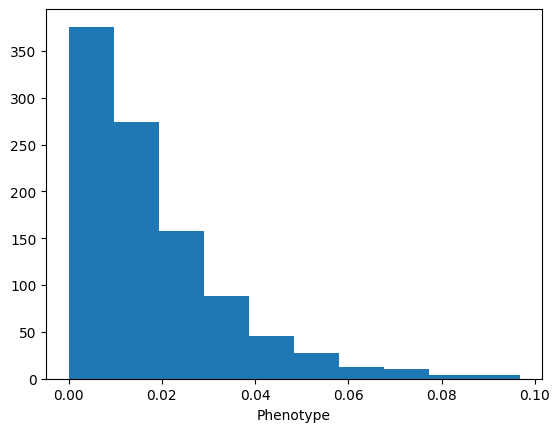

In [18]:
plt.hist(data_df_renames["phenotype"])
plt.xlabel("Phenotype")

In [19]:
polarisation_df_renames = polarisation_df.rename(columns=dict(zip(polarisation_df.columns, col_titles)))
polarisation_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_19991,Feature_19992,Feature_19993,Feature_19994,Feature_19995,Feature_19996,Feature_19997,Feature_19998,Feature_19999,phenotype
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.022267
0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.039160
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.003406
0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.015942
0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.026447
0,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.014401
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.023628


In [20]:
polarisation_df_renames = polarisation_df_renames.reset_index(drop=True)
polarisation_df_renames

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_19991,Feature_19992,Feature_19993,Feature_19994,Feature_19995,Feature_19996,Feature_19997,Feature_19998,Feature_19999,phenotype
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.022267
1,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.039160
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.003406
3,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.004879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.015942
996,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.026447
997,0.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.014401
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.023628


In [21]:
polarisation_df_renames.to_csv("../../data/magnet_dataset_polarisation.csv")

In [25]:
print(min(polarisation_df_renames["phenotype"]), max(polarisation_df_renames["phenotype"]))

0.0 0.09669783027954226


Try upscaling

In [26]:
polarisation_df_renames["phenotype"] *= 100
data_df_renames["phenotype"] *= 100

In [27]:
polarisation_df_renames.to_csv("../../data/magnet_dataset_polarisation_upscaled.csv")
data_df_renames.to_csv("../../data/magnet_dataset_x_positions_upscaled.csv")